# Exploratory Data Analysis
Using the clean dataset created in the `cleaning.ipynb`  notebook, I will be exploring the data to see if I can derive any meaningful insights into this dataset and the shape of the data. I will then be using that information to perform a meaningful statistical analysis, to determine answers to my questions. This will lead to final conclusions based on my findings.

## Intro

### The Data: 
The Dataset initially came from (Kaggle)[https://www.kaggle.com/datasets/smadler92/nfl-pfr], where the (user)[https://www.kaggle.com/smadler92] scraped the Data from the trusted and well known source of (Pro-Football-Reference)[https://www.pro-football-reference.com/]. 

The Data Initially came broken up into folders by team (32 folders), each containing multiple files. I joined the files of interest and cleaned the data, which can be seen in my previous [notebook](cleaning.ipynb).

I am also using the [weather csv](data/MFLML/weather.csv) that came with my data.

### Question:
Based on the available game statistics, what is most influential game statistic towards winning the game, and scoring by the largest spread? Does the Weather also influence game scoring (i.e. higher winds means lower total score), as well as influence teams to run the ball more?

### Hypothesis: 
I believe that teams that get the most amount of 1st down will have the best result when it comes to winning the game. I also believe that teams who play in high winds, will have a lower total score.

## Exploration

In [92]:
# Import Libraries
import pandas as pd # DataFrame manipulation
import numpy as np # linear algebra
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
import statsmodels.api as sm #statistics - linear regression

# Set up pandas environment
pd.set_option('display.max_columns', None) # all columns are shown
pd.options.display.float_format = '{:,.2f}'.format # all numbers to 2 decimals

# set up plotting environment
%matplotlib inline
sns.set_style("darkgrid")

###  Exploring the Scores DataFrame

In [78]:
# Load and check data
df = pd.read_csv('data/nfl_scores_clean.csv')
df.head()

,GameID,Year,Week,HomeTeam,HomeScore,AwayScore,AwayTeam,Home1D,HomeTotYd,HomePassYd,HomeRushYd,HomeTO,Away1D,AwayTotYd,AwayPassYd,AwayRushYd,AwayTO
0,197001NORATL,1970,01,NOR,3.00,14.00,ATL,9.00,235.00,150.00,85.00,2.00,14.00,265.00,116.00,149.00,2.00
1,197001BUFDEN,1970,01,BUF,10.00,25.00,DEN,8.00,149.00,56.00,93.00,4.00,11.00,282.00,146.00,136.00,3.00
2,197001NYGCHI,1970,01,NYG,16.00,24.00,CHI,16.00,311.00,253.00,58.00,3.00,18.00,256.00,158.00,98.00,3.00
3,197001CINRAI,1970,01,CIN,31.00,21.00,RAI,14.00,364.00,117.00,247.00,1.00,13.00,291.00,243.00,48.00,2.00
4,197001CLENYJ,1970,01,CLE,31.00,21.00,NYJ,20.00,221.00,145.00,76.00,NaN,31.00,454.00,286.00,168.00,4.00


In [79]:
# DataFrame information (dtypes and nulls)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GameID      12261 non-null  object 
 1   Year        12261 non-null  int64  
 2   Week        12261 non-null  object 
 3   HomeTeam    12261 non-null  object 
 4   HomeScore   12261 non-null  float64
 5   AwayScore   12261 non-null  float64
 6   AwayTeam    12261 non-null  object 
 7   Home1D      12261 non-null  float64
 8   HomeTotYd   12261 non-null  float64
 9   HomePassYd  12259 non-null  float64
 10  HomeRushYd  12261 non-null  float64
 11  HomeTO      10066 non-null  float64
 12  Away1D      12261 non-null  float64
 13  AwayTotYd   12261 non-null  float64
 14  AwayPassYd  12255 non-null  float64
 15  AwayRushYd  12260 non-null  float64
 16  AwayTO      10255 non-null  float64
dtypes: float64(12), int64(1), object(4)
memory usage: 1.6+ MB


In [80]:
# Summary stats
df.describe()

,Year,HomeScore,AwayScore,Home1D,HomeTotYd,HomePassYd,HomeRushYd,HomeTO,Away1D,AwayTotYd,AwayPassYd,AwayRushYd,AwayTO
count,"12,261.00","12,261.00","12,261.00","12,261.00","12,261.00","12,259.00","12,261.00","10,066.00","12,261.00","12,261.00","12,255.00","12,260.00","10,255.00"
mean,"1,996.57",22.36,19.70,19.22,331.06,207.97,123.12,2.31,18.23,316.39,202.06,114.44,2.38
std,14.45,10.44,10.15,4.99,85.15,79.65,53.93,1.35,5.02,86.48,79.75,52.19,1.36
min,"1,970.00",0.00,0.00,1.00,-7.00,-31.00,-3.00,1.00,2.00,26.00,-52.00,-18.00,1.00
25%,"1,984.00",15.00,13.00,16.00,273.00,153.00,84.00,1.00,15.00,257.00,146.00,77.00,1.00
50%,"1,997.00",22.00,20.00,19.00,331.00,204.00,116.00,2.00,18.00,316.00,198.00,107.00,2.00
75%,"2,009.00",29.00,27.00,23.00,387.00,259.00,156.00,3.00,22.00,375.00,254.00,145.00,3.00
max,"2,020.00",62.00,62.00,40.00,661.00,522.00,407.00,11.00,39.00,676.00,516.00,404.00,10.00


Looking quickly some things I have quickly noticed:
* Much of the data looks pretty normal (mean ~ median)
* The minimum tot yards for a home team was a loss of 7.0 yards (rough for that team, I wonder who it was and when?)
* Teams have had games with only 1 1st down

#### Adding Columns
There are some more stats that I would like to explore. This can be done by aggregating and maniuplating columns to receive some new or deeper insights.

Columns to add:
* `Spread` - The spread between the home and away team's score. This will be from the perspective of the home team (arbitrarily). 
* `HomeWin` - Whether or not the home team won. Determined by taking the sign of the `Spread`.
* `Total` - The total amount of points scored in the game between both the teams.
* `PassRushRatioTotal` - The ratio of the total passing yards vs the total rushing yards. This information should be more valuable then the absolute values, if determining that teams who pass/rush more are more successful.
* `HomePassRushRatio` - The ratio of the total passing yards vs the total rushing yards for the home team
* `AwayPassRushRatio` - The ratio of the total passing yards vs the total rushing yards for the away team
* `PassRushRatioDifference` - The difference in pass/rush ratio between home and away teams, from the perspective of the home team

Another useful column would be the spread of the home and away teams score. I will add a column that calculates this, from the perspective of the home team (ie: if the home team wins by 7, the value will be 7. If they lose by 7, the value will be -7)

In [83]:
# ADDING COLUMNS

# Determine score spread (from home team POV)
df['Spread'] = df['HomeScore'] - df['AwayScore']
# Add a column to determine if home team won or lost  (1 and 0 respectively)
df['HomeWin'] = df['Spread'].apply(lambda x: 1 if x>0 else 0)
# Find Total Score
df['Total'] = df['HomeScore'] + df['AwayScore']
# Pass/Rush Ratio Total Game
df['PassRushRatioTotal'] = (df['HomePassYd'] + df['AwayPassYd']) / (df['HomeRushYd'] + df['AwayRushYd']) # take combined pass from both teams, and divide by combined rush from both teams
# Pass/Rush Ratio for the Home Team
df['HomePassRushRatio'] = df['HomePassYd'] / df['HomeRushYd']
# Pass/Rush Ratio for the Away Team
df['AwayPassRushRatio'] = df['AwayPassYd'] / df['AwayRushYd']
# Difference in Pass/Rush Ration
df['PassRushRatioDifference'] = df['HomePassRushRatio'] - df['AwayPassRushRatio']

In [84]:
# Check df
df.sample(10)

,GameID,Year,Week,HomeTeam,HomeScore,AwayScore,AwayTeam,Home1D,HomeTotYd,HomePassYd,HomeRushYd,HomeTO,Away1D,AwayTotYd,AwayPassYd,AwayRushYd,AwayTO,Spread,HomeWin,Total,PassRushRatioTotal,HomePassRushRatio,AwayPassRushRatio,PassRushRatioDifference
1110,197513RAMGNB,1975,13,RAM,22.00,5.00,GNB,22.00,334.00,139.00,195.00,2.00,9.00,170.00,117.00,53.00,4.00,17.00,1,27.00,1.03,0.71,2.21,-1.49
6680,200001NWETAM,2000,01,NWE,16.00,21.00,TAM,14.00,278.00,190.00,88.00,1.00,17.00,296.00,156.00,140.00,1.00,-5.00,0,37.00,1.52,2.16,1.11,1.04
1279,197611MIACLT,1976,11,MIA,16.00,17.00,CLT,16.00,338.00,251.00,87.00,2.00,20.00,340.00,177.00,163.00,2.00,-1.00,0,33.00,1.71,2.89,1.09,1.80
10481,201407RAVATL,2014,07,RAV,29.00,7.00,ATL,23.00,371.00,248.00,123.00,3.00,16.00,254.00,186.00,68.00,1.00,22.00,1,36.00,2.27,2.02,2.74,-0.72
9485,201012CHIPHI,2010,12,CHI,31.00,26.00,PHI,18.00,349.00,218.00,131.00,NaN,24.00,398.00,293.00,105.00,1.00,5.00,1,57.00,2.17,1.66,2.79,-1.13
3072,1984DIWASCHI,1984,DI,WAS,19.00,23.00,CHI,22.00,336.00,243.00,93.00,1.00,13.00,310.00,196.00,114.00,1.00,-4.00,0,42.00,2.12,2.61,1.72,0.89
4939,199301CLTMIA,1993,01,CLT,20.00,24.00,MIA,16.00,274.00,232.00,42.00,3.00,19.00,355.00,236.00,119.00,2.00,-4.00,0,44.00,2.91,5.52,1.98,3.54
8526,200701CLEPIT,2007,01,CLE,7.00,34.00,PIT,13.00,221.00,175.00,46.00,5.00,17.00,365.00,159.00,206.00,1.00,-27.00,0,41.00,1.33,3.80,0.77,3.03
2596,198217SDGRAI,1982,17,SDG,34.00,41.00,RAI,29.00,438.00,281.00,157.00,2.00,21.00,354.00,197.00,157.00,1.00,-7.00,0,75.00,1.52,1.79,1.25,0.54
768,197401OTISDG,1974,01,OTI,21.00,14.00,SDG,19.00,349.00,193.00,156.00,1.00,23.00,411.00,195.00,216.00,5.00,7.00,1,35.00,1.04,1.24,0.90,0.33


#### Exploring with plots and stats
I am going to explore some of the more important statistics (especially in relation with answering my questions of 'what stat infuluence game spread the most? Does the wind affect the Total Points Scored?'

In [49]:
# Check the Distrubtion of spread
print(f"The mean of the spread is {df.Spread.mean()}")
print(f"The median of the spread is {df.Spread.median()}")
print(f"The mode of the spread is {df.Spread.mode()}")

The mean of the spread is 2.668134736155289
The median of the spread is 3.0
The mode of the spread is 0    3.0
Name: Spread, dtype: float64


Awesome, this data is looking like a normal distrubtion! We can further check this by plotting distribution:

<Figure size 1080x576 with 0 Axes>

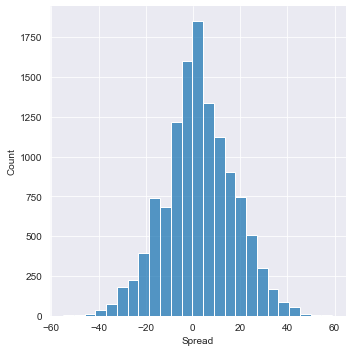

In [93]:
plt.figure(figsize=(15,8))
sns.displot(data=df, x='Spread', bins=25)

We can see in the above distrubiton, that the Spread looks 'mostly' normal. The interesting thing is that the spread is certainly aggregated around the mean/median! Lets quickly check the Standard Deviation as well:

In [94]:
# Standard Deviation
print(f"The Stanadard Deviation of the Spread is: {df.Spread.std()}")

The Stanadard Deviation of the Spread is: 14.75915023018747


I am happy with the distribution of the `Spread` and feel it will be reliable for further analysis. Let's continue by looking at the total score:

In [95]:
# Total Score
print(f"The mean of the spread is {df.Total.mean()}")
print(f"The median of the spread is {df.Total.median()}")
print(f"The mode of the spread is {df.Total.mode()}")

The mean of the spread is 42.05839654188076
The median of the spread is 41.0
The mode of the spread is 0   37.00
Name: Total, dtype: float64


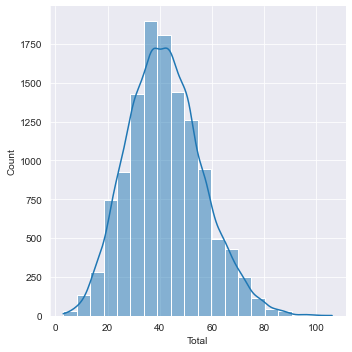

In [97]:
sns.displot(data=df, x='Total', bins=20, kde=True)

This column appears to be quite normal as well! It should be **NOTED** though that because of the nature of the column, the left side of the distribution is cut-off at 0, because there cannot be less than 0 points scored in a game.

I would now also like to explore how the total score may have changed over time. We'll be looking at the mean total score over the years:

<AxesSubplot:xlabel='Year', ylabel='Total'>

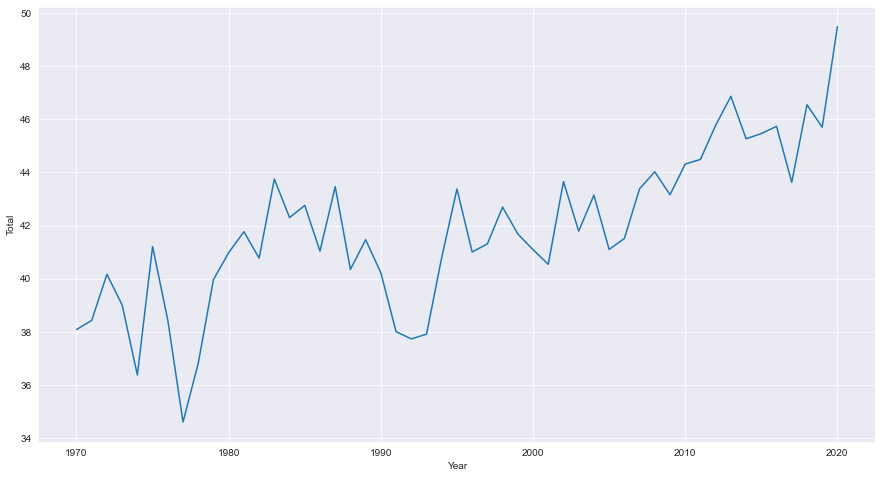

In [100]:
# Line plot for totalscore over the years
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='Year',y='Total', estimator='mean', ci=None)

Pretty interesting! It appears that over time, teams are on average scoring more (2020 being the highest scoring season in the last 50 years). I wonder if there has been a change in the passing vs rushing game that would have an influence on this?

<AxesSubplot:xlabel='Year', ylabel='PassRushRatioTotal'>

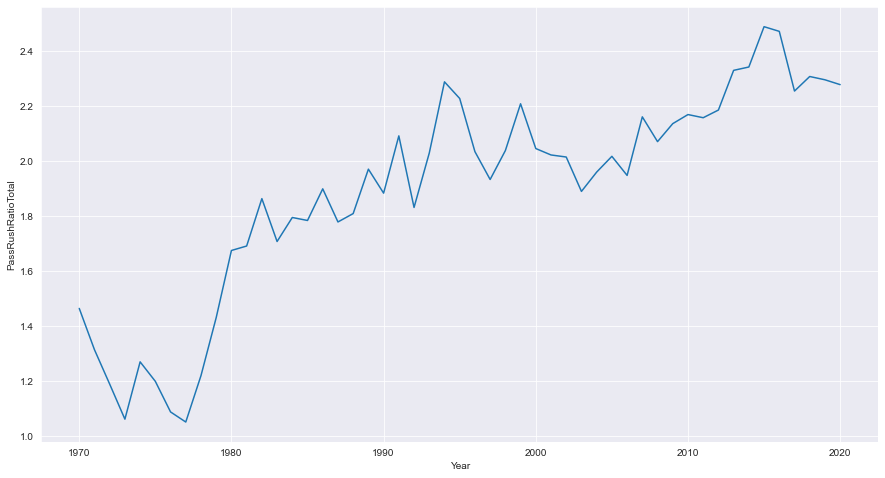

In [105]:
# Line plot of total pass/rush ratio over the years
plt.figure(figsize=(15,8))
sns.lineplot(data=df, x='Year',y='PassRushRatioTotal', ci=None)

Well it certainly looks like that as teams are throwing more passes (more pass yards) as opposed to rushing, we get a higher total score as well. This is something I will come back to later in my analysis, as I would like to see if this can be statistically proven. 

This brings me though to the process of correlation. I am wondering if any of our stats are highly correlated, while also considering that there will be multicollinearity between columns from which others were created (for example, total score and home score will obvious be highly correlated). There will be many instances of this to be cautious of, but let's just take a quick look if anything different pops out of interest:

<AxesSubplot:>

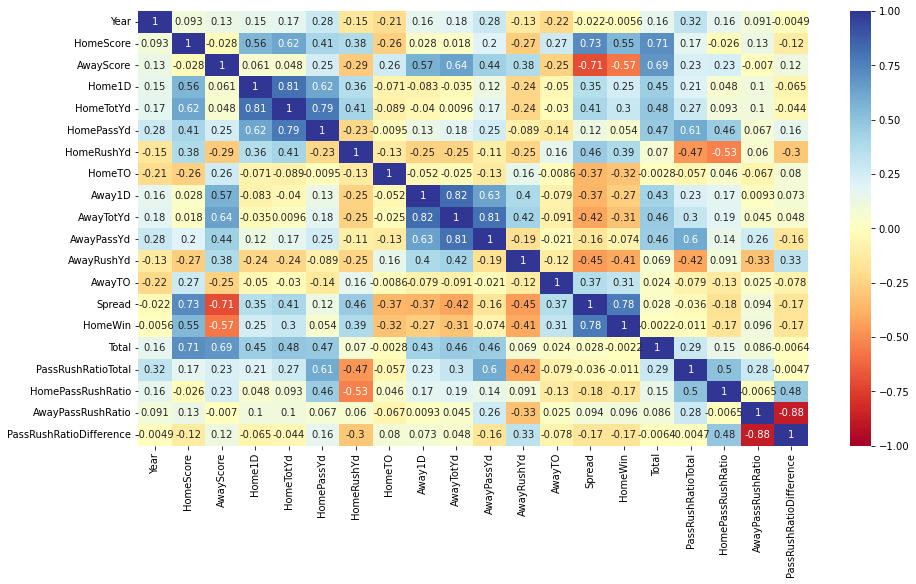

In [90]:
# Plotting a Correlation Heatmap
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), vmin=-1.0, annot=True, cmap='RdYlBu')

### Exploring the Weather DataFrame

In [13]:
# Load the Weather DataSet
weather = pd.read_csv('data/NFLML/Weather.csv')
weather.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,MIA,14.0,23.0,RAI,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71,NaN
1,9/3/1966,1966,1,False,OTI,45.0,7.0,DEN,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70,NaN
2,9/4/1966,1966,1,False,SDG,27.0,7.0,BUF,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82,NaN
3,9/9/1966,1966,2,False,MIA,14.0,19.0,NYJ,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78,NaN
4,9/10/1966,1966,1,False,GNB,24.0,3.0,CLT,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62,NaN


In [14]:
weather.schedule_season.unique()

array([1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021], dtype=int64)

In [15]:
# Only care about data from 1970 - 2020 (to match our other data)
weather = weather.loc[weather['schedule_season'] > 1969]
weather = weather.loc[weather['schedule_season'] < 2021]
weather.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
728,9/18/1970,1970,1,False,RAM,34.0,13.0,CRD,NaN,NaN,NaN,Los Angeles Memorial Coliseum,False,63.0,10.0,84,NaN
729,9/19/1970,1970,1,False,NYG,16.0,24.0,CHI,NaN,NaN,NaN,Yankee Stadium,False,71.0,13.0,70,NaN
730,9/20/1970,1970,1,False,NWE,27.0,14.0,MIA,NaN,NaN,NaN,Harvard Stadium,False,66.0,12.0,64,NaN
731,9/20/1970,1970,1,False,BUF,10.0,25.0,DEN,NaN,NaN,NaN,War Memorial Stadium,False,63.0,7.0,72,NaN
732,9/20/1970,1970,1,False,CIN,31.0,21.0,RAI,NaN,NaN,NaN,Cinergy Field,False,74.0,10.0,58,NaN


In [16]:
df.head()

,GameID,Year,Week,HomeTeam,HomeScore,AwayScore,AwayTeam,Home1D,HomeTotYd,HomePassYd,HomeRushYd,HomeTO,Away1D,AwayTotYd,AwayPassYd,AwayRushYd,AwayTO,Spread,HomeWin
0,197001NORATL,1970,01,NOR,3.0,14.0,ATL,9.0,235.0,150.0,85.0,2.0,14.0,265.0,116.0,149.0,2.0,-11.0,0
1,197001BUFDEN,1970,01,BUF,10.0,25.0,DEN,8.0,149.0,56.0,93.0,4.0,11.0,282.0,146.0,136.0,3.0,-15.0,0
2,197001NYGCHI,1970,01,NYG,16.0,24.0,CHI,16.0,311.0,253.0,58.0,3.0,18.0,256.0,158.0,98.0,3.0,-8.0,0
3,197001CINRAI,1970,01,CIN,31.0,21.0,RAI,14.0,364.0,117.0,247.0,1.0,13.0,291.0,243.0,48.0,2.0,10.0,1
4,197001CLENYJ,1970,01,CLE,31.0,21.0,NYJ,20.0,221.0,145.0,76.0,NaN,31.0,454.0,286.0,168.0,4.0,10.0,1


In [30]:
# Have to change the 'schedule_week' column of weather so it matches that of df
week_map = {'1': '01', '2':'02','3':'03','4':'04','5':'05','6':'06','7':'07','8':'08','9':'09','Wild Card':'WC',
            'Division':'DI','Conf. Champ.':'CC','SuperBowl':'SB', 'Wildcard':'WC','WildCard':'WC','Superbowl':'SB','Conference':'CC'}
weather.schedule_week.replace(week_map, inplace=True)
weather.schedule_week.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', 'DI', 'CC', 'SB', '15', '16', 'WC', '17', '18'],
      dtype=object)

In [33]:
df_merged = pd.merge(left=df, right=weather, left_on=['Year','Week','HomeTeam'], right_on=['schedule_season','schedule_week','team_home'], how='left') #left join the two DataFrames

In [34]:
df_merged.shape

(12262, 36)

In [35]:
weather.shape

(12219, 17)

In [36]:
df_merged.sample(20)

,GameID,Year,Week,HomeTeam,HomeScore,AwayScore,AwayTeam,Home1D,HomeTotYd,HomePassYd,...,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
8695,200712RAMSEA,2007,12,RAM,19.0,24.0,SEA,17.0,265.0,161.0,...,SEA,SEA,-3.0,46,Edward Jones Dome,False,72.0,0.0,NaN,DOME
3004,198412CLTNWE,1984,12,CLT,17.0,50.0,NWE,17.0,266.0,129.0,...,NWE,NE,-6.5,43,RCA Dome,False,72.0,0.0,NaN,DOME
8591,200705DENSDG,2007,05,DEN,3.0,41.0,SDG,17.0,296.0,224.0,...,SDG,LAC,-1.0,43.5,Sports Authority Field at Mile High,False,50.0,16.0,47,NaN
11464,201801CLEPIT,2018,01,CLE,21.0,21.0,PIT,22.0,327.0,150.0,...,PIT,PIT,-3.5,41,FirstEnergy Stadium,False,58.0,11.0,NaN,Rain
4527,199105MINDEN,1991,05,MIN,6.0,13.0,DEN,15.0,324.0,121.0,...,DEN,MIN,-5.0,40,Hubert H. Humphrey Metrodome,False,72.0,0.0,NaN,DOME
11580,201809WASATL,2018,09,WAS,14.0,38.0,ATL,20.0,366.0,287.0,...,ATL,WAS,-1.5,46.5,FedEx Field,False,55.0,5.0,NaN,NaN
3484,198613CLEOTI,1986,13,CLE,13.0,10.0,OTI,18.0,345.0,170.0,...,OTI,CLE,-7.0,41,Cleveland Municipal Stadium,False,38.0,12.0,77,NaN
8402,200611NYJCHI,2006,11,NYJ,0.0,10.0,CHI,15.0,264.0,156.0,...,CHI,CHI,-5.5,40.5,Giants Stadium,False,47.0,12.0,58,NaN
2704,198307GNBWAS,1983,07,GNB,48.0,47.0,WAS,23.0,473.0,403.0,...,WAS,WAS,-3.0,52,Lambeau Field,False,47.0,10.0,67,NaN
1122,197514MIADEN,1975,14,MIA,14.0,13.0,DEN,16.0,203.0,90.0,...,DEN,NaN,NaN,NaN,Orange Bowl,False,64.0,9.0,69,NaN


## Analysis 
In this section I will be using statistics and modelling to answer my questions on the data

### Question 1) Does the Ratio of Pass Yards to Rush Yards Affect the Teams Score? How does it affect the total Score?

In [ ]:
# Create new DataFrame for columns of interest
df_pr = 

## Conclusions

### Future Considerations:
In the future I would like to dive deeper into what makes a team win. To do this however I would need a more inclusive and larger dataset. Some stats I would be interested in is:
* number of pass attempts
* number of pass completions
* number of rush attempts
* number of rush completions
* number of extra points / 2-pt conversions
* 4th down conversions
* How points were scored (touchdowns, field goals, etc.)
* Defensive Stats (sacks, interceptions


With this data (and more) I'd be able to answer much more interesting questions, such as how has the game changed over time - do we see more kicking, more 4th-down attempts, more pass attempts? Football is a sport that is dominated by statistics, and people dedicate their lives to it, so I'd love to see if I could draw similar or differing conclusions if I had access to the same data. 